In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings


from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [115]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<b>
gender = gender;
age = age;
hypertension = Hypertension binary feature;
heart_disease = Heart disease binary featur;
ever_married = Has the patient ever been married?;
work_type = Work type of the patient;
Residence_type = Residence type of the patient;
avg_glucose_level = Average glucose level in blood;
bmi = Body Mass Index; </b>

#### Заменем пропущенные значения в "bmi" средним значением "bmi" для их пола

In [117]:
F_missing_bmi_index = df[(df.gender == 'Female') & (df.bmi.isna())].index
df.loc[F_missing_bmi_index, 'bmi'] = 29

M_missing_bmi_index = df[(df.gender == 'Male') & (df.bmi.isna())].index
df.loc[M_missing_bmi_index, 'bmi'] = 28


In [118]:
df_res = df.drop('id',axis = 1)
df_res.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [119]:
# Преобразуем наши данные в новый тип
df_res['gender'] = df_res['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df_res['Residence_type'] = df_res['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df_res['work_type'] = df_res['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
df_res['ever_married'] = df_res['ever_married'].replace({'Yes':1, 'No':0}).astype(np.uint8)
df_res['smoking_status'] = df_res['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1}).astype(np.uint8)

In [120]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   uint8  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   uint8  
 5   work_type          5110 non-null   uint8  
 6   Residence_type     5110 non-null   uint8  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   uint8  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), uint8(5)
memory usage: 264.6 KB


In [121]:
df_res.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Визуализируем данные

## Heatmap

<AxesSubplot:>

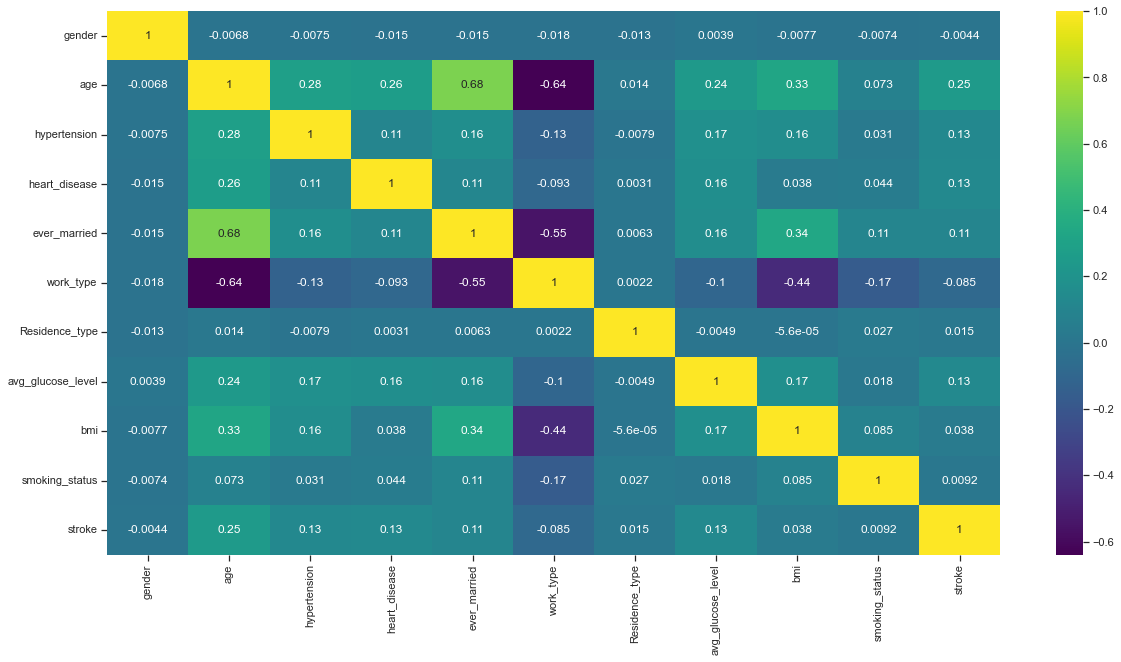

In [122]:
    plt.figure(figsize=(20,10))
    sns.heatmap(df_res.corr(), annot= True,cmap= 'viridis')

## Гистограммы распределение признаков

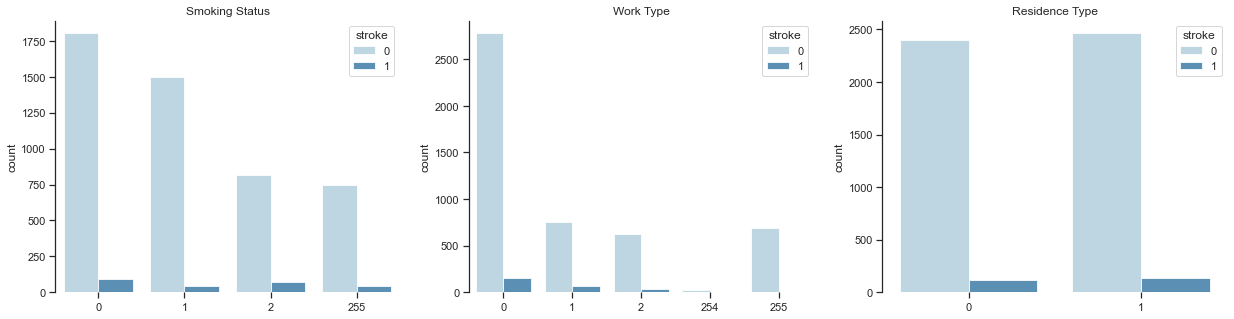

In [123]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x=df_res['smoking_status'], alpha=0.8, palette="Paired",hue=df_res['stroke'])
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
plt.xlabel('')
plt.title('Smoking Status')

plt.subplot(1,3,2)
sns.countplot(x=df_res['work_type'], alpha=0.8, palette="Paired", hue=df_res['stroke'])
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
plt.xlabel('')
plt.title('Work Type')

plt.subplot(1,3,3)
sns.countplot(x=df_res['Residence_type'], alpha=0.8, palette="Paired", hue=df_res['stroke'])
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
plt.xlabel('')
plt.title('Residence Type');

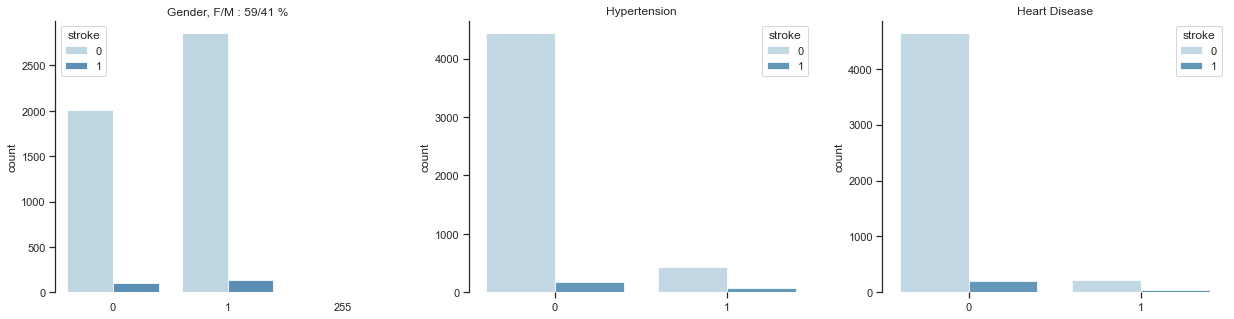

In [124]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x=df_res['gender'], alpha=0.8, palette="Paired", hue=df_res['stroke'])
plt.tick_params(axis='both', which='both', bottom=False, left=True, right=False, top=False, labelbottom=True, labelleft=True)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
plt.xlabel('')
plt.title('Gender, F/M : 59/41 %')

plt.subplot(1,3,2)
sns.countplot(x=df_res['hypertension'], alpha=0.75, palette="Paired", hue=df_res['stroke'])
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
plt.xlabel('')
plt.title('Hypertension')

plt.subplot(1,3,3)
sns.countplot(x=df_res['heart_disease'], alpha=0.75, palette="Paired", hue=df_res['stroke'])
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
plt.xlabel('')
plt.title('Heart Disease');

## Boxplot



<AxesSubplot:xlabel='avg_glucose_level'>

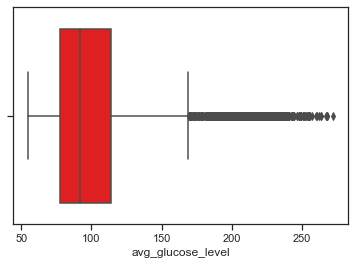

In [125]:
sns.boxplot(x='avg_glucose_level',data=df_res, color='Red')

<AxesSubplot:xlabel='bmi'>

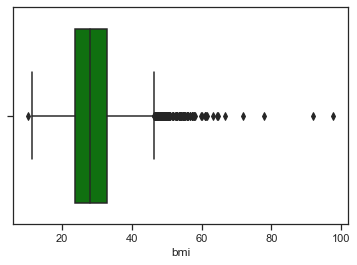

In [126]:
sns.boxplot(x='bmi',data=df_res, color = 'Green')

<AxesSubplot:xlabel='age'>

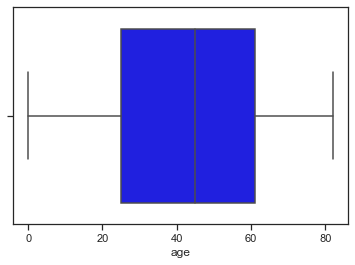

In [127]:
sns.boxplot(x='age',data=df_res , color = 'Blue')

## PairPlot

In [128]:
# sns.set(style="ticks")
# pal = ["#FA5858", "#58D3F7"]
#
# sns.pairplot(df_res, hue="stroke", palette=pal)
# plt.title("stroke");

## Train test split

In [129]:
from sklearn.model_selection import train_test_split

X = df_res.drop(['stroke'], axis = 1)
y = df_res['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## KNeighborsClassifier

In [130]:
#Standardize the Variables
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [131]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)

In [132]:
# from sklearn import svm
# from mlxtend.plotting import plot_decision_regions
# plot_decision_regions(X, y, clf=svm, legend=2)

In [133]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[958   7]
 [ 56   1]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       965
           1       0.12      0.02      0.03        57

    accuracy                           0.94      1022
   macro avg       0.53      0.51      0.50      1022
weighted avg       0.90      0.94      0.92      1022



In [134]:
print(accuracy_score(y_test,pred))

0.9383561643835616


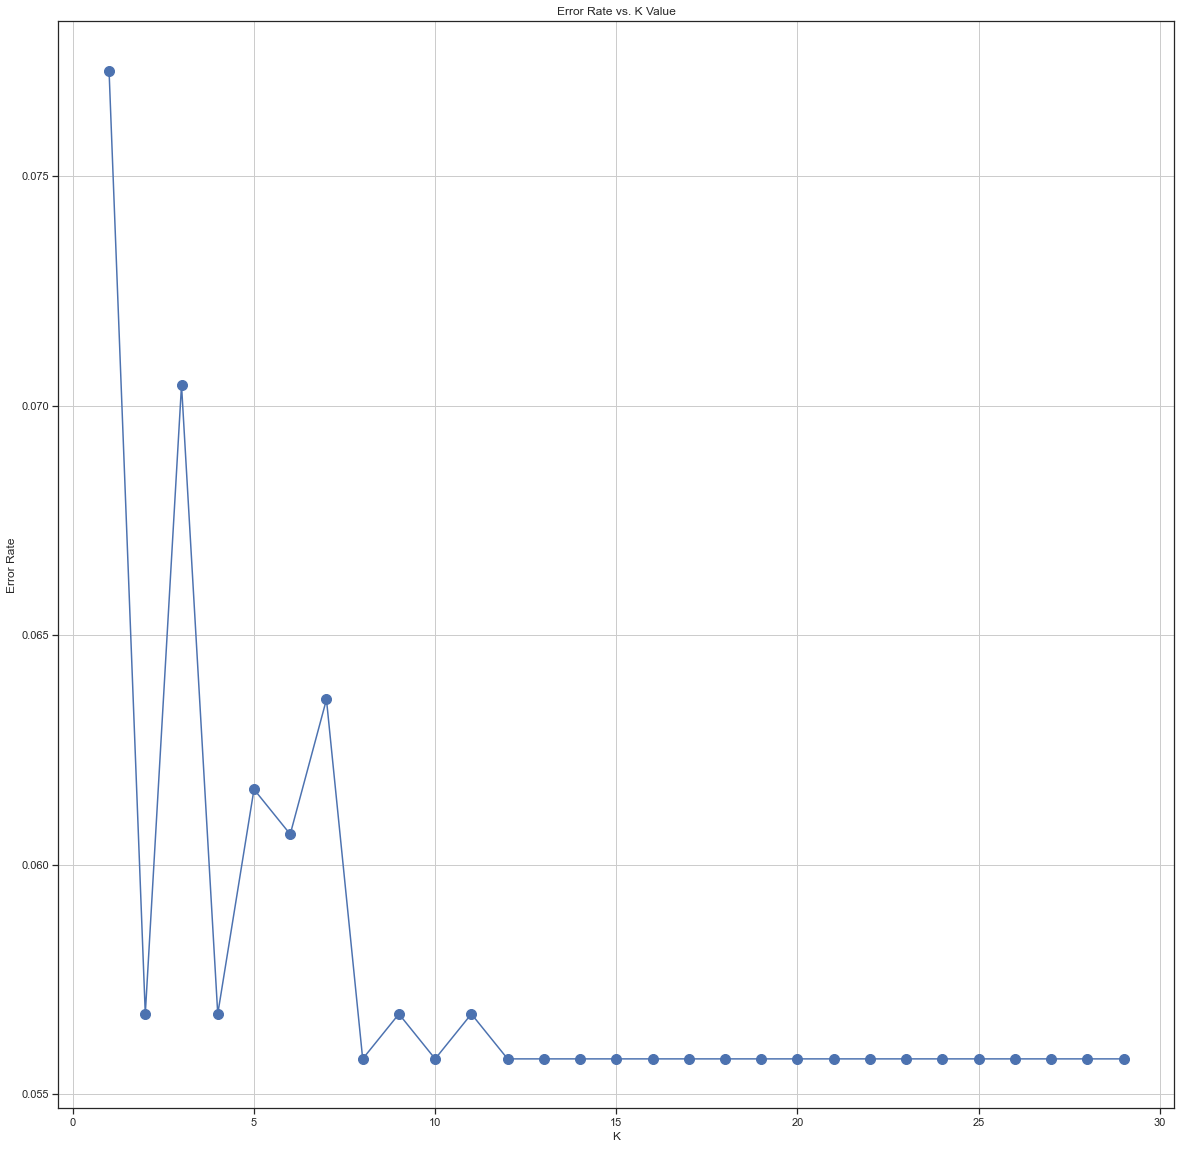

In [135]:
# Choosing a K Value
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(20,20))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [136]:
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[965   0]
 [ 57   0]]

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.00      0.00      0.00        57

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.89      0.94      0.92      1022



## Decision Tree

In [137]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       965
           1       0.15      0.14      0.14        57

    accuracy                           0.91      1022
   macro avg       0.55      0.55      0.55      1022
weighted avg       0.90      0.91      0.91      1022



In [139]:
print(confusion_matrix(y_test, y_pred))

[[919  46]
 [ 49   8]]


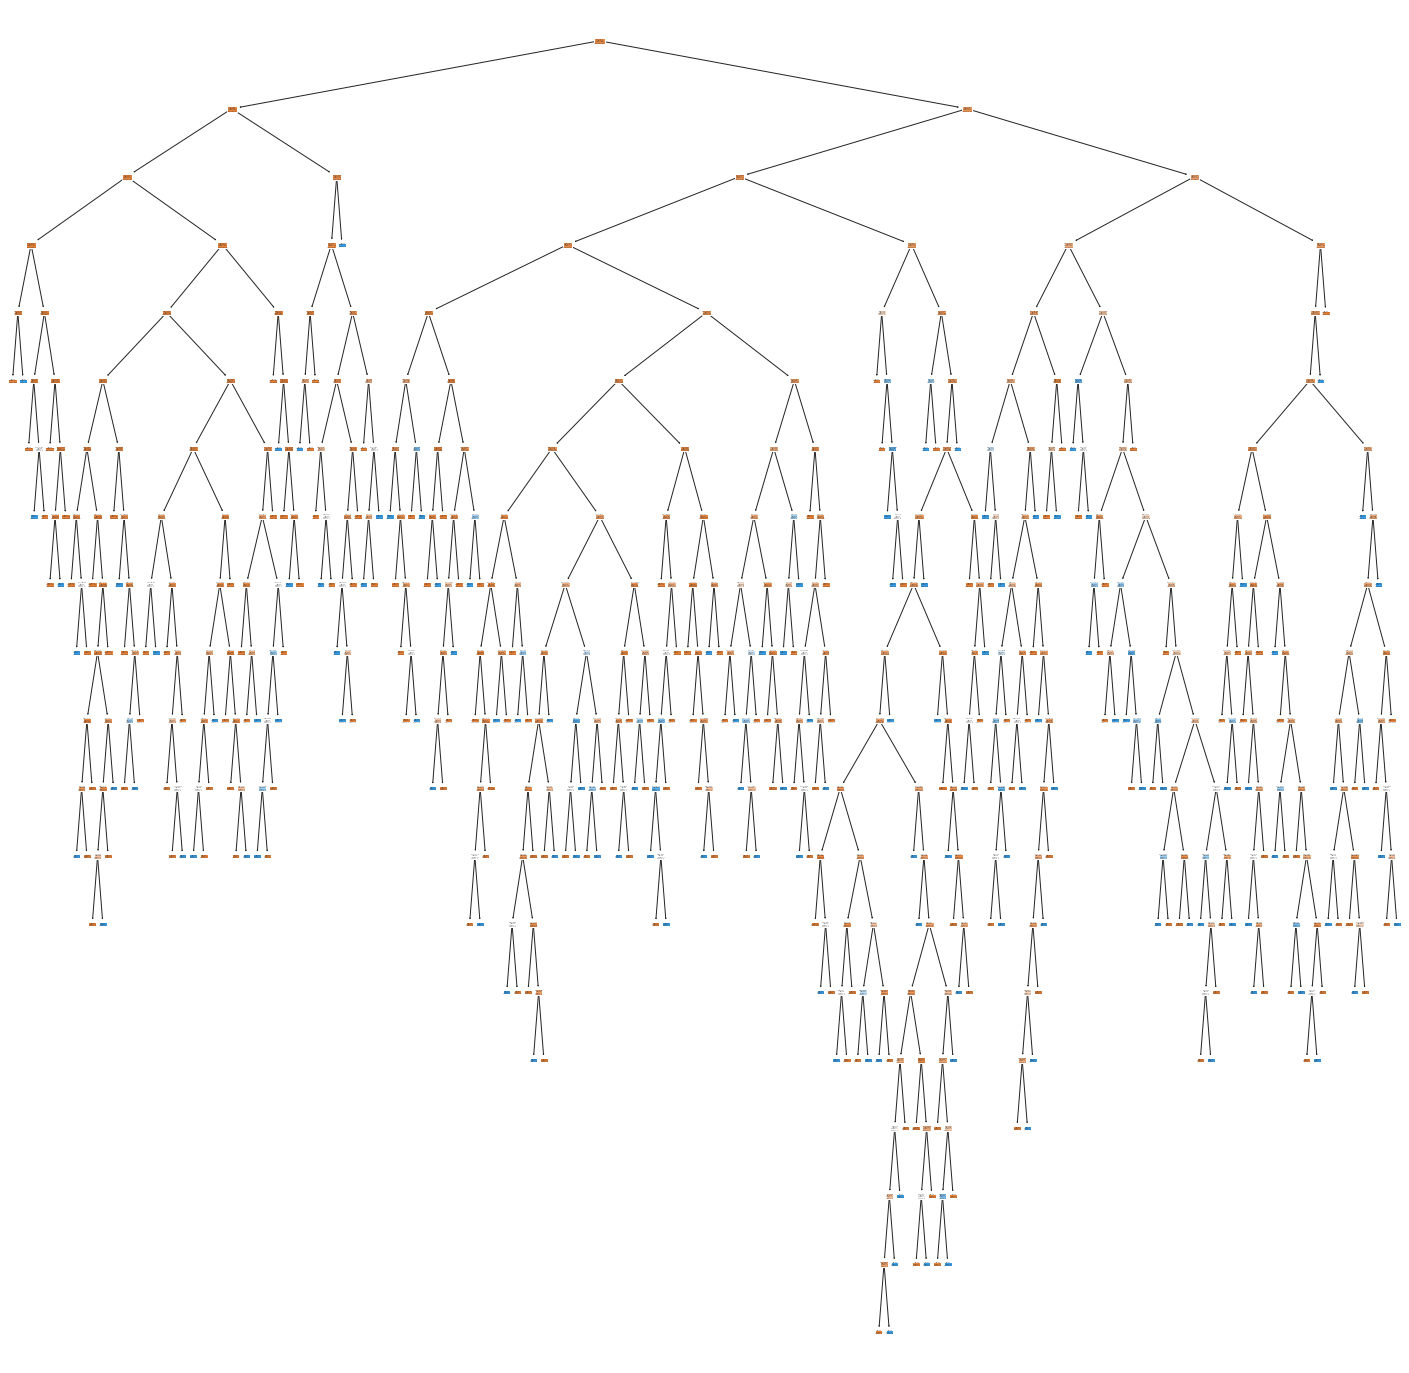

In [140]:
plt.figure(figsize = (25, 25))
plot_tree(model, filled = True)
plt.show()

## SVM

In [141]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [142]:
model = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')
model.fit(scaled_X_train,y_train)
y_pred = model.predict(scaled_X_test)

In [143]:
print(confusion_matrix(y_test, y_pred))

[[965   0]
 [ 57   0]]


In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.00      0.00      0.00        57

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.89      0.94      0.92      1022



In [145]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True)

grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [146]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [147]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

In [148]:
grid_predictions = grid.predict(scaled_X_test)

In [149]:
print(confusion_matrix(y_test,grid_predictions))

[[965   0]
 [ 57   0]]


In [150]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.00      0.00      0.00        57

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.89      0.94      0.92      1022



## Random Forest

## AdaBoost
